# ハンズオン

In [1]:
%matplotlib inline
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets # download iris dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_validation import train_test_split

In [2]:
# load data_set
iris = datasets.load_iris()

# extract x & y of 2 classes only
features = iris.data[:100, :]
target = iris.target[:100]

# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [3]:
# classification for train data
lda = LinearDiscriminantAnalysis() # generate model
lda.fit(x_train, y_train) # learning
transformed_x_train = lda.transform(x_train)
transformed_x_test = lda.transform(x_test)

In [4]:
# print coefficients
print """
coefficients  : %s
feature_names : %s
intercept     : %s
""" % (lda.coef_, iris.feature_names, lda.intercept_)


coefficients  : [[ -3.35968854 -16.87240746  24.94516595  29.20706627]]
feature_names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
intercept     : [-24.74555707]



(array([ 0.17307181,  0.        ,  0.34614362,  0.51921544,  0.51921544]),
 array([ 2.03780545,  2.67979971,  3.32179398,  3.96378824,  4.60578251,
         5.24777678]),
 <a list of 5 Patch objects>)

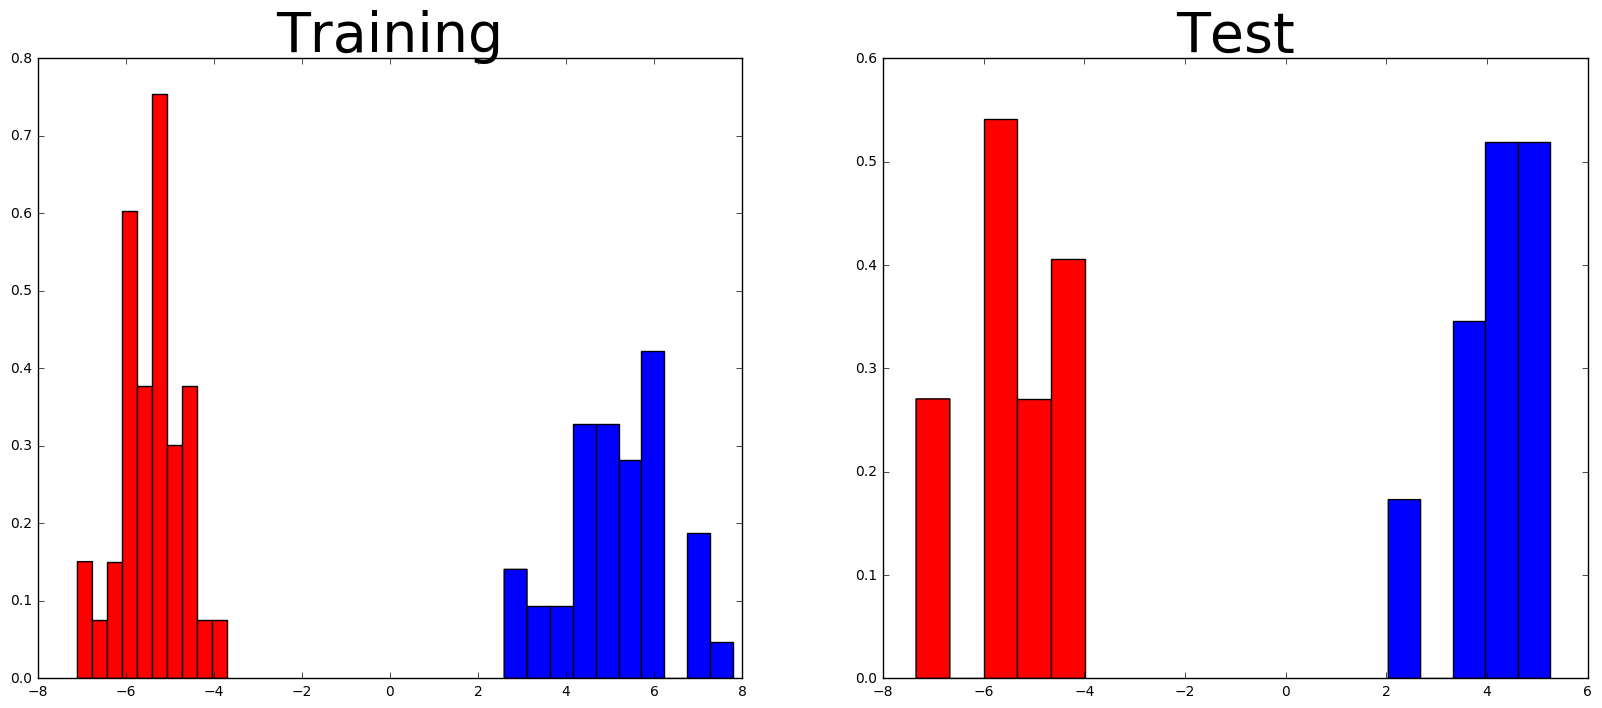

In [5]:
# plot training data
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
axL.set_title("Training", fontsize=40)
axL.hist(transformed_x_train[np.where(transformed_x_train < 0)], bins=10, normed=True, color='red')
axL.hist(transformed_x_train[np.where(transformed_x_train > 0)], bins=10, normed=True, color='blue')

# plot test data
axR.set_title("Test", fontsize=40)
axR.hist(transformed_x_test[np.where(transformed_x_test < 0)], bins=5, normed=True, color='red')
axR.hist(transformed_x_test[np.where(transformed_x_test > 0)], bins=5, normed=True, color='blue')

In [6]:
# get accuracy
accuracy = lda.score(x_test, y_test)
print "accuracy is %f" % accuracy

accuracy is 1.000000
